# __Statical tests__

## Outline
- __Dependencies__
- __Noiseless__
    - With dense matrices
    - With poisson matrix
- __With noise using Qiskit AER__
    - With dense matrices
    - With poisson matrix

In [ ]:
import numpy as np
from device_var_lse_solver import DeviceVarLSESolver
from device import DeviceType
from conditioned_matrix import conditionedMatrix
from conditioned_matrix import poissonMatrix
from non_dynamical_ansatz import fixed_layered_ansatz
from tqdm import tqdm

qubits = 4
b = np.ones(2**qubits)/np.sqrt(2**qubits)

assert qubits % 2 == 0

In [ ]:
# As defined by [10]
def TRC_ASA(iteration_count : dict):
    trc = 0
    max_size = max(iteration_count)
    for d in iteration_count:
        z = iteration_count.get(d)
        trc += z*max_size
    print(max_size)
    return trc

3
75


## __Noiseless tests__

In [ ]:
# For poisson matrix
N_runs = 10
N_steps = 50
max_c = 20
redo_calc = 10

local_results = np.zeros([N_runs, len(b)])
global_results = np.zeros([N_runs, len(b)])

cs = [2*i+1 for i in range(int(max_c/2))]

local_dense_trc = np.zeros((redo_calc, len(cs)))
global_dense_trc = np.zeros((redo_calc, len(cs)))
local_poisson_trc = np.zeros((redo_calc,))
global_poisson_trc = np.zeros((redo_calc,))

for i in range(redo_calc):
        print(f"Run nr. {i+1}/{redo_calc}")
        # Dense matrix
        for j, c in enumerate(tqdm(cs)):
                a = conditionedMatrix(2**qubits, c)
                lse_local = DeviceVarLSESolver(a,
                        b, 
                        method='direct',
                        ansatz=fixed_layered_ansatz,
                        local=True, 
                        lr=0.1, 
                        steps=N_steps,
                        threshold=0.001, 
                        epochs=N_runs,
                        silent=True)
                
                lse_global = DeviceVarLSESolver(a,
                        b, 
                        method='direct',
                        ansatz=fixed_layered_ansatz,
                        local=False, 
                        lr=0.1, 
                        steps=N_steps,
                        threshold=0.001, 
                        epochs=N_runs,
                        silent=True)
        
                solution_local, param_local, it_count_local = lse_local.solve()
                solution_global, param_global, it_count_global = lse_global.solve()

                local_dense_trc[i, j] = TRC_ASA(it_count_local)
                global_dense_trc[i, j] = TRC_ASA(it_count_global)
        
        # Poisson matrix
        a = poissonMatrix(int(np.sqrt(2**qubits)))
        lse_local = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                ansatz=fixed_layered_ansatz,
                local=True, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs,
                silent=True)
        
        lse_global = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                ansatz=fixed_layered_ansatz,
                local=False, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs,
                silent=True)
        
        solution_local, param_local, it_count_local = lse_local.solve()
        solution_global, param_global, it_count_global = lse_global.solve()

        local_poisson_trc[i] = TRC_ASA(it_count_local)
        global_poisson_trc[i] = TRC_ASA(it_count_global)

Run nr. 1/10


100%|██████████| 10/10 [09:43<00:00, 58.38s/it]


In [ ]:
import matplotlib.pyplot as plt

local_dense_mean = np.mean(local_dense_trc, axis=0)
local_dense_variance = np.var(local_dense_trc, axis=0)

global_dense_mean = np.mean(global_dense_trc, axis=0)
global_dense_variance = np.var(global_dense_trc, axis=0)

local_poisson_mean = local_poisson_trc.mean()
local_poisson_variance = local_poisson_trc.var()

global_poisson_mean = global_poisson_trc.mean()
global_poisson_variance = global_poisson_trc.var()

### __Poisson plots__

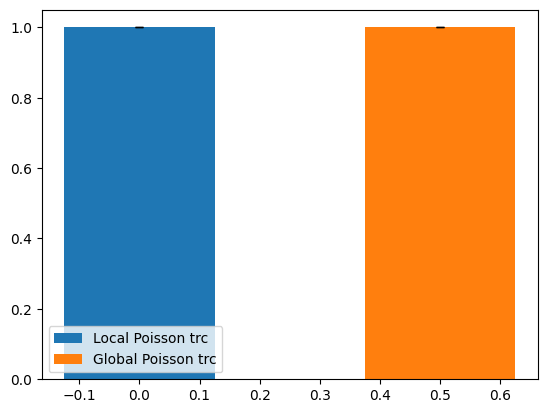

In [ ]:
width = 0.25 
plt.bar(0, local_poisson_mean, yerr=local_poisson_variance, width=width, capsize=3, label='Local Poisson trc')
plt.bar(2*width, global_poisson_mean, yerr=global_poisson_variance, width=width, capsize=3, label='Global Poisson trc')

plt.legend()
plt.show()

### __Dense matrix plots__

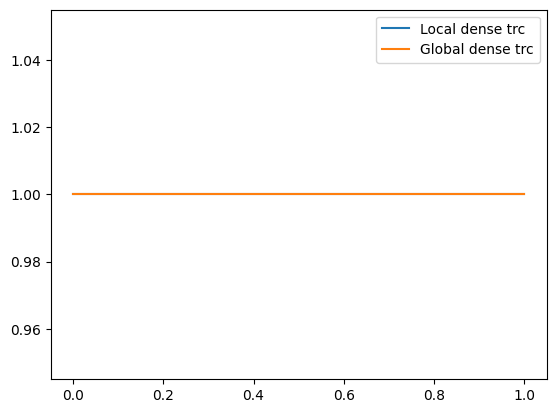

In [ ]:
amp = 0.05

local_color = "tab:blue"
plt.plot(cs, local_dense_mean, color=local_color, label=f'Local TRC expectation with {amp}*variance')
plt.fill_between(cs, local_dense_mean-amp*local_dense_variance, local_dense_mean+amp*local_dense_variance, color=local_color, alpha=0.4)

global_color = "tab:orange"
plt.plot(cs, global_dense_mean, color=global_color, label=f'Global TRC expectation with {amp}*variance')
plt.fill_between(cs, global_dense_mean-amp*global_dense_variance, global_dense_mean+amp*global_dense_variance, color=global_color, alpha=0.4)

plt.xlabel("Conditional number")
plt.ylabel("TRC score")

plt.legend()
plt.show()

## __Noisy tests__

In [ ]:
# For poisson matrix
N_runs = 10
N_steps = 50
max_c = 20
redo_calc = 10

local_results = np.zeros([N_runs, len(b)])
global_results = np.zeros([N_runs, len(b)])

cs = [2*i+1 for i in range(int(max_c/2))]

local_dense_trc = np.zeros((redo_calc, len(cs)))
global_dense_trc = np.zeros((redo_calc, len(cs)))
local_poisson_trc = np.zeros((redo_calc,))
global_poisson_trc = np.zeros((redo_calc,))

for i in range(redo_calc):
        print(f"Run nr. {i+1}/{redo_calc}")
        # Dense matrix
        for j, c in enumerate(tqdm(cs)):
                a = conditionedMatrix(2**qubits, c)
                lse_local = DeviceVarLSESolver(a,
                        b, 
                        method='direct',
                        ansatz=fixed_layered_ansatz,
                        local=True, 
                        lr=0.1, 
                        steps=N_steps,
                        threshold=0.001, 
                        epochs=N_runs,
                        device=DeviceType.QISKIT_AER,
                        silent=True)
                
                lse_global = DeviceVarLSESolver(a,
                        b, 
                        method='direct',
                        ansatz=fixed_layered_ansatz,
                        local=False, 
                        lr=0.1, 
                        steps=N_steps,
                        threshold=0.001, 
                        epochs=N_runs,
                        device=DeviceType.QISKIT_AER,
                        silent=True)
        
                solution_local, param_local, it_count_local = lse_local.solve()
                solution_global, param_global, it_count_global = lse_global.solve()

                local_dense_trc[i, j] = TRC_ASA(it_count_local)
                global_dense_trc[i, j] = TRC_ASA(it_count_global)
        
        # Poisson matrix
        a = poissonMatrix(int(np.sqrt(2**qubits)))
        lse_local = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                ansatz=fixed_layered_ansatz,
                local=True, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs,
                silent=True)
        
        lse_global = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                ansatz=fixed_layered_ansatz,
                local=False, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs,
                silent=True)
        
        solution_local, param_local, it_count_local = lse_local.solve()
        solution_global, param_global, it_count_global = lse_global.solve()

        local_poisson_trc[i] = TRC_ASA(it_count_local)
        global_poisson_trc[i] = TRC_ASA(it_count_global)

In [ ]:
import matplotlib.pyplot as plt

local_dense_mean = np.mean(local_dense_trc, axis=0)
local_dense_variance = np.var(local_dense_trc, axis=0)

global_dense_mean = np.mean(global_dense_trc, axis=0)
global_dense_variance = np.var(global_dense_trc, axis=0)

local_poisson_mean = local_poisson_trc.mean()
local_poisson_variance = local_poisson_trc.var()

global_poisson_mean = global_poisson_trc.mean()
global_poisson_variance = global_poisson_trc.var()

### __Poisson plot__

In [ ]:
width = 0.25 

plt.bar(0, local_poisson_mean, yerr=local_poisson_variance, width=width, capsize=3, label='Local Poisson trc')
plt.bar(2*width, global_poisson_mean, yerr=global_poisson_variance, width=width, capsize=3, label='Global Poisson trc')

plt.legend()
plt.show()

### __Dense matrix plot__

In [ ]:
amp = 0.05

local_color = "tab:blue"
plt.plot(cs, local_dense_mean, color=local_color, label=f'Local TRC expectation with {amp}*variance')
plt.fill_between(cs, local_dense_mean-amp*local_dense_variance, local_dense_mean+amp*local_dense_variance, color=local_color, alpha=0.4)

global_color = "tab:orange"
plt.plot(cs, global_dense_mean, color=global_color, label=f'Global TRC expectation with {amp}*variance')
plt.fill_between(cs, global_dense_mean-amp*global_dense_variance, global_dense_mean+amp*global_dense_variance, color=global_color, alpha=0.4)

plt.xlabel("Conditional number")
plt.ylabel("TRC score")

plt.legend()
plt.show()